In [12]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import scipy.stats
import os

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### AD + KS

In [13]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


## KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected
## AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

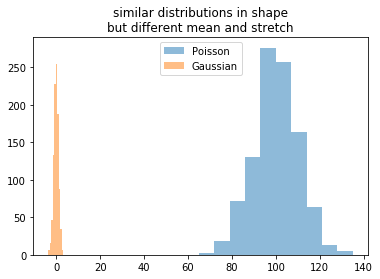

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


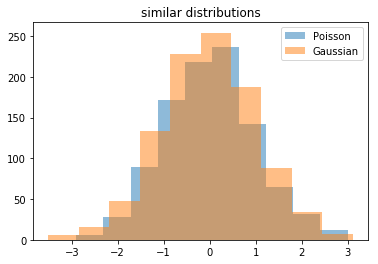

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


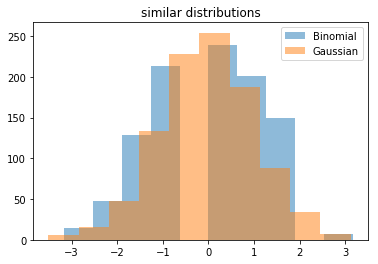

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456722, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [14]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))

#### Intrepretation

Null hypothesis: test distribution comes from the normal distribution.

First graph: p value of 0 proves null hypothesis, that distributions are **not** the same. Therefore the distribution of samples is not of the normal distribution.

Second graph: p value above .05 shows that it cannot be proven that the distribution of samples is not of the normal distribution. BUT, the AD statistic is greater than the threshold, which does prove our null hypothesis.

Third graph: p value of 0 proves null hypothesis, that distributions are **not** the same. Therefore the distribution of samples is not of the normal distribution.

Therefore, our conclusions generally are: that a dataset taken from a normalized poisson distribution is likely to follow a normal distribution, and that a dataset taken from a normalized binomial distribution does not follow the normal distribution.



### KL DIVERGENCE

The KL divergence is a little trickier:

empirical distribution it wants to know the distribution y value at a location x. have to pass it the values of the distribution at some x's, not my histogram though, si I need a NORMALIZED HOSTOGRAM OF MY DISTRIBUTION, i.e. derive a probability distribution function (PDF) from the data.

model Then I have to pass it a function for my comparison distribution evaluated at the same x-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)


In [15]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) evaluated at the bin centers of the histogram from before

In [16]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.342671686058


These values are the log difference between the two distributions. Converted, the differences are:

N on N: 1.00366103391

P on N: 1.00363390626

B on N: 1.24254862375

N on N and P on N are very close to the normal, so you may not be able to reject the null hypothesis. For B on N you can likely reject because it is quite different. This supports our prior conclusions: that the normalized poisson sample likely comes from the normal distribution, and that the normalized binomial sample does not.

### Chi Squared Test

In [17]:
print("poisson vs normal:", scipy.stats.chisquare(distpdf_p, scipy.stats.norm.pdf(bincenters_p)))

print("binomial vs normal:", scipy.stats.chisquare(distpdf_b, scipy.stats.norm.pdf(bincenters_b)))

poisson vs normal: Power_divergenceResult(statistic=0.020055348804746038, pvalue=0.99999999998081412)
binomial vs normal: Power_divergenceResult(statistic=0.74550524154912212, pvalue=0.99983373885293192)


Both p values are greater than .05, which means we can't conlcude whether or not the samples come from the normal distribution or not. However, the statistic for binomial is higher than for poisson, which means you can come closer to rejecting the null hypothesis for binomial than for poisson.

## BINOMIAL - INSTRUCTIONS for assignment

with the binomial distribution I can change np. larger np will make the distribution look more "normal" (i.e. Gaussian). In a loop test that the binomial tends to a normal distribution as you increase the value of n*p

In [18]:
narray = np.arange(0, 500, 10)

In [19]:
np.random.seed(999)
ks_s_b = np.zeros(50)
ks_p_b = np.zeros(50)
ad_b = np.zeros(50)
kl_b = np.zeros(50)
chi_p_b = np.zeros(50)
chi_s_b = np.zeros(50)
#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0]/1000., 
                                    scipy.stats.norm.pdf(bincenters))
    
    chi_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]

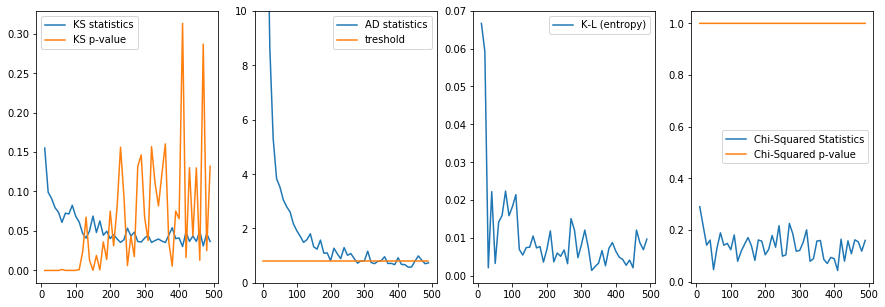

In [20]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(143)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend()

fig.add_subplot(144)
pl.plot(narray, chi_s_b, label = "Chi-Squared Statistics")
pl.plot(narray, chi_p_b, label = "Chi-Squared p-value")
pl.legend()

**KS Interpretation:** The p value increases and the KS statistics decrease as np increases, suggesting that as N increases it bceomes harders to disprove the null hypothesis. This means that as n for the binomial distribution increases, it is likely that it comes closer to resembling the normal distribution.

**AD Intrepretation:** As n increases, the AD statistic decreases, eventually going below the threshold. This means that as n increases it becomes harder to disprove the null hypothesis, suggesting that as n increases the binomial distribution gets closer to the normal distribution.

**KL interpretation:** Entropy decreases as n increases, suggesting that the difference between the binomial distribution and the normal distribution gets smaller as n increases.

**Chi-Squared Interpretation:** While the p values stays the same as n increases, the chi squared statistic decreases. This means that it becomes harder to disprove the null hypothesis as n increases, suggesting the a binomial distribution with a larger n value gets closer to the normal distribution.


### POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution¶


Bianca helped with the graphing / normalization

In [21]:
np.random.seed(999)
ks_s_p = np.zeros(50)
ks_p_p = np.zeros(50)
ad_p = np.zeros(50)
kl_p = np.zeros(50)
chi_p_p = np.zeros(50)
chi_s_p = np.zeros(50)
#loop over the different values of n (or n and p)
for i, lam in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.poisson(lam, size = 1000) - lam)*sqrt(1/lam)
    #run the tests
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_p[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0]/1000, 
                                    scipy.stats.norm.pdf(bincenters))
    chi_s_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000, 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0]/1000, 
                                    scipy.stats.norm.pdf(bincenters))[1]

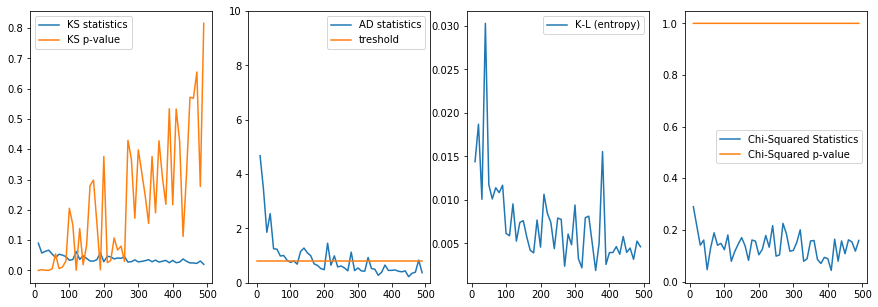

In [11]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(143)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.legend()

fig.add_subplot(144)
pl.plot(narray, chi_s_b, label = "Chi-Squared Statistics")
pl.plot(narray, chi_p_b, label = "Chi-Squared p-value")
pl.legend()

**KS Interpretation:** The p value increases and the KS statistics decrease as lambda increases, suggesting that as lambda increases it bceomes harders to disprove the null hypothesis. This means that as lambda for the poisson distribution increases, it is likely that it comes closer to resembling the normal distribution.

**AD Intrepretation:** As lambda increases, the AD statistic decreases, eventually going below the threshold. This means that as lambda increases it becomes harder to disprove the null hypothesis, suggesting that as lambda increases the poisson distribution gets closer to the normal distribution.

**KL interpretation:** Entropy decreases as lambda increases, suggesting that the difference between the poisson distribution and the normal distribution gets smaller as lambda increases.

**Chi-Squared Interpretation:** While the p values stays the same as lambda increases, the chi squared statistic decreases. This means that it becomes harder to disprove the null hypothesis as labmda increases, suggesting the a poisson distribution with a larger lambda value gets closer to the normal distribution.